## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
mouse_metadata= pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:

# Combine the data into a single datase
combine_mouse_data= pd.merge(mouse_metadata, study_results, how= 'outer', on="Mouse ID")


# Display the data table for preview
combine_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
len(pd.unique(combine_mouse_data["Mouse ID"]))

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_timepoint = combine_mouse_data.groupby("Mouse ID")


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_dedupe = combine_mouse_data.drop_duplicates(subset = ['Mouse ID','Timepoint'])
mouse_dedupe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(combine_mouse_data["Mouse ID"]))

249

## Summary Statistics

In [8]:
tumor_vol = mouse_dedupe[["Drug Regimen", "Tumor Volume (mm3)"]]
drugs= tumor_vol["Drug Regimen"].unique()

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_vol = mouse_dedupe[["Drug Regimen", "Tumor Volume (mm3)"]]
# mean, median

tumor_vol_mean = tumor_vol.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
tumor_vol_median = tumor_vol.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
# variance, standard deviaition:
tumor_vol_variance = tumor_vol.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
tumor_vol_std = tumor_vol.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()

# SEM 
tumor_vol_sem = tumor_vol.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()
tumor_vol_sem

tumor_vol_data = {'Mean Tumor Volume' : tumor_vol_mean, 'Median Tumor Volume': tumor_vol_median, "Variance": tumor_vol_variance, "Standard Deviation": tumor_vol_std, "Standard Error of the Mean": tumor_vol_sem }



In [10]:
# Assemble the resulting series into a single summary dataframe.
tumor_vol_df = pd.DataFrame(tumor_vol_data)
tumor_vol_df

,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_counts = mouse_dedupe['Drug Regimen'].value_counts()
drug_counts



Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Number of Measurments taken')

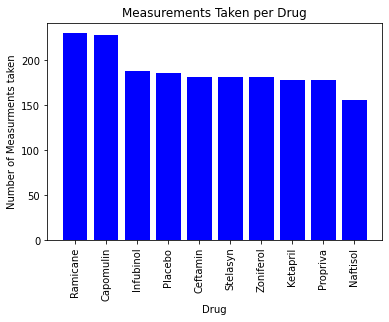

In [44]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_counts = drug_counts
x_axis = drugs
plt.bar(x_axis, drug_counts, color = 'b', align= "center")
plt.xticks(rotation='vertical')
plt.title ("Measurements Taken per Drug")
plt.xlabel("Drug")
plt.ylabel("Number of Measurments taken")


NameError: name 'ax' is not defined

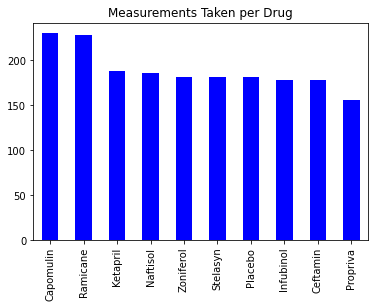

In [49]:
drug_counts.plot(kind="bar", facecolor="b", title="Measurements Taken per Drug")
ax.set_ylabel("Number of Measurements taken") 
ax.set_xlabel("Drug")

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_dedupe.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


([<matplotlib.patches.Wedge at 0x1c25d9ec8b0>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')],
 [Text(-0.013976124569910401, 0.5998372011987972, '50.7%'),
  Text(0.01397606840909865, -0.5998372025073339, '49.3%')])

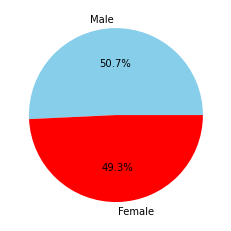

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [958, 930]
colors = ["skyblue", "red"]
sex_values = mouse_dedupe["Sex"].value_counts()
sex_values

plt.pie(sex_values, labels=labels, colors=colors, autopct="%1.1f%%")


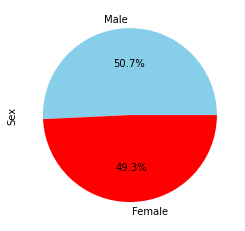

In [35]:
# generate same chart using pandas
plot = sex_values.plot.pie(subplots=True, colors=colors, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [16]:
timepoint = mouse_dedupe.sort_values(by="Timepoint", ascending=False)
timepoint =timepoint[timepoint["Drug Regimen"]!='Ketapril']   
timepoint =timepoint[timepoint["Drug Regimen"]!='Propriva'] 
timepoint =timepoint[timepoint["Drug Regimen"]!='Naftisol']
timepoint =timepoint[timepoint["Drug Regimen"]!='Zoniferol'] 
timepoint =timepoint[timepoint["Drug Regimen"]!='Stelasyn']
timepoint =timepoint[timepoint["Drug Regimen"]!='Placebo'] 
timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
834,f345,Infubinol,Male,23,26,45,60.918767,1
134,r554,Capomulin,Female,8,17,45,32.377357,3
144,m957,Capomulin,Female,3,19,45,33.329098,1
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
...,...,...,...,...,...,...,...,...
484,a275,Ceftamin,Female,20,28,0,45.000000,0
825,f345,Infubinol,Male,23,26,0,45.000000,0
75,z578,Ramicane,Male,11,16,0,45.000000,0
1661,w151,Ceftamin,Male,24,25,0,45.000000,0


In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin




# Start by getting the last (greatest) timepoint for each mouse

timepoint = timepoint.sort_values(by="Timepoint", ascending=False)
timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
834,f345,Infubinol,Male,23,26,45,60.918767,1
299,b742,Capomulin,Male,7,21,45,38.939633,0
272,d251,Ramicane,Female,8,19,45,37.311236,2
244,g288,Capomulin,Male,3,19,45,37.074024,1
430,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
1069,k804,Infubinol,Female,23,29,0,45.000000,0
263,d251,Ramicane,Female,8,19,0,45.000000,0
245,i334,Ramicane,Female,8,20,0,45.000000,0
273,l897,Capomulin,Male,17,19,0,45.000000,0


In [18]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
